In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import sys
import scipy as sp
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import random
import time

In [3]:
from sklearn import feature_selection
from statistics import mean

In [4]:
data_raw_train= pd.read_csv('./data/titanic/titanic_train.csv', index_col='PassengerId')
data_test= pd.read_csv('./data/titanic/titanic_test.csv',index_col='PassengerId')
labels_test= pd.read_csv('./data/titanic/gender_submission.csv',index_col='PassengerId')

In [5]:
data_raw_train.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Lindqvist, Mr. Eino William",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
data_raw_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data_raw_test=pd.concat([data_test, labels_test], axis=1)

In [8]:
data_raw_test.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188,0.363636
std,0.841838,14.181209,0.896760,0.981429,55.907576,0.481622
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [9]:
data_drop_train = data_raw_train.drop(['Name', 'Ticket', 'Cabin'], axis = 1)
data_drop_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [10]:
data_drop_test = data_raw_test.drop(['Name', 'Ticket', 'Cabin'], axis = 1)
data_drop_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
PassengerId,,,,,,,,
892,3,male,34.5,0,0,7.8292,Q,0
893,3,female,47.0,1,0,7.0000,S,1
894,2,male,62.0,0,0,9.6875,Q,0
895,3,male,27.0,0,0,8.6625,S,0
896,3,female,22.0,1,1,12.2875,S,1


In [11]:
data_drop_train.Embarked.fillna("S", inplace=True) #most embarked
data_drop_test.Embarked.fillna("S", inplace=True)
data_drop_train.Age.fillna(data_drop_train.Age.median(), inplace=True)
data_drop_test.Age.fillna(data_drop_test.Age.median(), inplace=True)
data_drop_test.Fare.fillna(data_drop_test.Fare.median(), inplace=True)
data_drop_train.Fare.fillna(data_drop_train.Fare.median(), inplace=True)

In [12]:
data_drop_train.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,646
mean,0.383838,2.308642,NaN,29.361582,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,13.019697,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN


In [13]:
bins=[0,20,40,60,100]
data_drop_train['age_bin']=pd.cut(data_drop_train['Age'], bins)
data_drop_test['age_bin']=pd.cut(data_drop_test['Age'], bins)

In [14]:
data_drop_train.age_bin = data_drop_train.age_bin.astype(str)
data_drop_test.age_bin = data_drop_test.age_bin.astype(str)

In [15]:
data_drop_train.loc[(data_drop_train['age_bin'] == '(20, 40]'), 'age_bin'] = 'Y'
data_drop_train.loc[(data_drop_train['age_bin'] == '(40, 60]'), 'age_bin'] = 'M'
data_drop_train.loc[(data_drop_train['age_bin'] == '(0, 20]'), 'age_bin'] = 'C'
data_drop_train.loc[(data_drop_train['age_bin'] == '(60, 100]'), 'age_bin'] = 'S'

In [16]:
data_drop_test.loc[(data_drop_test['age_bin'] == '(20, 40]'), 'age_bin'] = 'Y'
data_drop_test.loc[(data_drop_test['age_bin'] == '(40, 60]'), 'age_bin'] = 'M'
data_drop_test.loc[(data_drop_test['age_bin'] == '(0, 20]'), 'age_bin'] = 'C'
data_drop_test.loc[(data_drop_test['age_bin'] == '(60, 100]'), 'age_bin'] = 'S'

In [17]:
data_drop_train['Relts']= data_drop_train['SibSp']+data_drop_train['Parch']
data_drop_test['Relts']= data_drop_test['SibSp']+data_drop_test['Parch']

In [18]:
data_drop_test = data_drop_test.drop(['Age','SibSp','Parch'], axis = 1)
data_drop_train = data_drop_train.drop(['Age','SibSp','Parch'], axis = 1)
# data_drop_test = data_drop_test.drop(['SibSp','Parch'], axis = 1)
# data_drop_train = data_drop_train.drop(['SibSp','Parch'], axis = 1)

In [19]:
data_drop_train.describe(include='all')

,Survived,Pclass,Sex,Fare,Embarked,age_bin,Relts
count,891.000000,891.000000,891,891.000000,891,891,891.000000
unique,NaN,NaN,2,NaN,3,4,NaN
top,NaN,NaN,male,NaN,S,Y,NaN
freq,NaN,NaN,577,NaN,646,562,NaN
mean,0.383838,2.308642,NaN,32.204208,NaN,NaN,0.904602
std,0.486592,0.836071,NaN,49.693429,NaN,NaN,1.613459
min,0.000000,1.000000,NaN,0.000000,NaN,NaN,0.000000
25%,0.000000,2.000000,NaN,7.910400,NaN,NaN,0.000000
50%,0.000000,3.000000,NaN,14.454200,NaN,NaN,0.000000
75%,1.000000,3.000000,NaN,31.000000,NaN,NaN,1.000000


In [20]:
data_drop_test.describe(include='all')

,Pclass,Sex,Fare,Embarked,Survived,age_bin,Relts
count,418.000000,418,418.000000,418,418.000000,418,418.000000
unique,NaN,2,NaN,3,NaN,4,NaN
top,NaN,male,NaN,S,NaN,Y,NaN
freq,NaN,266,NaN,270,NaN,272,NaN
mean,2.265550,NaN,35.576535,NaN,0.363636,NaN,0.839713
std,0.841838,NaN,55.850103,NaN,0.481622,NaN,1.519072
min,1.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
25%,1.000000,NaN,7.895800,NaN,0.000000,NaN,0.000000
50%,3.000000,NaN,14.454200,NaN,0.000000,NaN,0.000000
75%,3.000000,NaN,31.471875,NaN,1.000000,NaN,1.000000


<Figure size 864x864 with 0 Axes>

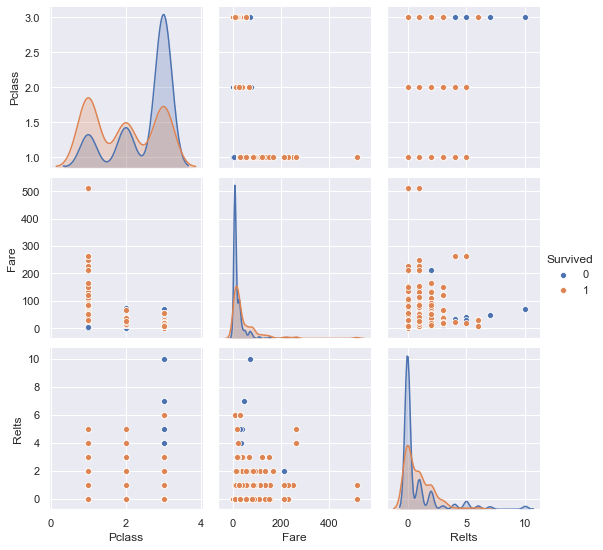

In [21]:
plt.figure(figsize=(12,12))
sns.pairplot(data_drop_train, hue='Survived', vars=['Pclass', 'Fare', 'Relts'])
plt.show()

In [22]:
#_, bins = np.histogram(data_drop_train["Pclass"])
#g = sns.FacetGrid(data_drop_train, hue="Survived")
#g = g.map(sns.distplot, "Pclass", bins=bins)
#plt.show()

In [23]:
data_train=pd.get_dummies(data_drop_train,drop_first=True)
data_test=pd.get_dummies(data_drop_test, drop_first=True)
#data_train = data_train.drop(['Sex_female'],axis=1)
#data_test = data_test.drop(['Sex_female'],axis=1)

In [24]:
data_train.describe()

,Survived,Pclass,Fare,Relts,Sex_male,Embarked_Q,Embarked_S,age_bin_M,age_bin_S,age_bin_Y
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,32.204208,0.904602,0.647587,0.086420,0.725028,0.143659,0.024691,0.630752
std,0.486592,0.836071,49.693429,1.613459,0.477990,0.281141,0.446751,0.350940,0.155270,0.482872
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,14.454200,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,31.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,512.329200,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
data_test.describe()

,Pclass,Fare,Survived,Relts,Sex_male,Embarked_Q,Embarked_S,age_bin_M,age_bin_S,age_bin_Y
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,35.576535,0.363636,0.839713,0.636364,0.110048,0.645933,0.157895,0.026316,0.650718
std,0.841838,55.850103,0.481622,1.519072,0.481622,0.313324,0.478803,0.365079,0.160265,0.477315
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,31.471875,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,512.329200,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
y_train=np.array(data_train.Survived)
y_test=np.array(data_test.Survived)
y_train.reshape(-1,1)
y_test.reshape(-1,1)

array([[0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [27]:
x_train=data_train.drop(['Survived'],axis=1)
x_test=data_test.drop(['Survived'],axis=1)
x_all=pd.concat([x_train,x_test])
x_all.describe()

,Pclass,Fare,Relts,Sex_male,Embarked_Q,Embarked_S,age_bin_M,age_bin_S,age_bin_Y
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,33.281086,0.883881,0.644003,0.093965,0.699771,0.148205,0.025210,0.637128
std,0.837836,51.741500,1.583639,0.478997,0.291891,0.458533,0.355439,0.156823,0.481012
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,14.454200,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,31.275000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,512.329200,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
from sklearn.preprocessing import StandardScaler
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels import RBF
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from xgboost import XGBClassifier

In [29]:
scl=StandardScaler()
scl.fit(x_all)
x_train=scl.transform(x_train)
x_test=scl.transform(x_test)

In [30]:
# param_grid ={'algorithm':('SAMME','SAMME.R'), 'n_estimators':[20,30,50]}
# abc=AdaBoostClassifier()
# clf_cv=GridSearchCV(abc, param_grid, cv=5)
# clf_cv.fit(x_train, y_train)
# print(clf_cv.best_params_)

In [31]:
# #param_grid ={'criterion':('gini','entropy'), 'n_estimators':[100], 'min_samples_split':[50], 'oob_score':[False]}
# clf_cv=GaussianNB()
# #clf_cv=GridSearchCV(rfc, param_grid, cv=5)
# clf_cv.fit(x_train, y_train)
# #print(clf_cv.best_params_)

In [32]:
param_grid ={'max_depth':[6,8,10,16],'n_estimators':[80,100], 'eta': [0.05], 'importance_type':('gain', 'total_gain')}
xgbc=XGBClassifier()
clf_cv=GridSearchCV(xgbc, param_grid, cv=5)
clf_cv.fit(x_train, y_train)
print(clf_cv.best_params_)

{'eta': 0.04, 'importance_type': 'gain', 'max_depth': 8, 'n_estimators': 120}


In [33]:
# param_grid ={'criterion':('gini','entropy'), 'n_estimators':[100], 'min_samples_split':[20], 'oob_score':[False]}
# rfc=RandomForestClassifier()
# clf_cv=GridSearchCV(rfc, param_grid, cv=5)
# clf_cv.fit(x_train, y_train)
# print(clf_cv.best_params_)

In [34]:
# param_grid ={'n_restarts_optimizer':[0,1,2], 'max_iter_predict':[50,100,200]}
# kern=RBF
# clf_cv=GaussianProcessClassifier(1.0 * RBF(1.0))
# clf_cv.fit(x_train, y_train)
# #print(clf_cv.best_params_)

In [35]:
# param_grid ={'weights':('uniform','distance'), 'n_neighbors':[10, 15, 20, 25, 30], 'p':[1,2], 'algorithm':('auto','ball_tree','kd_tree'), 'leaf_size':[5,10,30,50]}
# knn=KNeighborsClassifier()
# clf_cv=GridSearchCV(knn, param_grid)
# clf_cv.fit(x_train, y_train)
# print(clf_cv.best_params_)

In [36]:
# param_grid ={'criterion':('gini','entropy'), 'min_samples_split':[2,5,10, 20,30, 40, 50]}
# dt=DecisionTreeClassifier()
# clf_cv=GridSearchCV(dt,param_grid)
# clf_cv.fit(x_train, y_train)
# print(clf_cv.best_params_)

In [37]:
# param_grid ={'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'degree':[2,3,4], 'C':[1,5,10], 'gamma':('scale','auto')}
# svm=SVC()
# clf_cv=GridSearchCV(svm,param_grid)
# clf_cv.fit(x_train, y_train)
# print(clf_cv.best_params_)

In [38]:
# cv_score_best = cross_val_score(clf_cv, x_train, y_train, cv= 5)
# print(mean(cv_score_best))

In [48]:
pred = clf_cv.predict(x_test)
res = pd.DataFrame({'PassengerId': data_test.index, 'Survived': pred})

In [49]:
clf_cv.score(x_test,y_test)

0.861244019138756

In [50]:
print(f1_score(y_test,pred))

0.8079470198675497


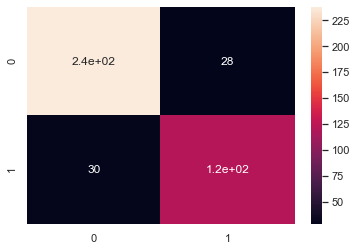

In [51]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)

In [52]:
res.to_csv('results/titanic_sub2_xgb.csv', index=False)

In [44]:
#end of code

In [45]:
#end of code

In [46]:
#end of code

In [47]:
#end of code